In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve

# Titanic
<img src="https://ibcdn.canaltech.com.br/5uFYyzz-BCXzkZk1OlnDzYs9lc8=/512x288/smart/i248658.jpeg" width="400" height="100"/>

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/massquantity/Kaggle-Titanic/master/Data/train.csv')

In [5]:
df['Survived'].drop_duplicates()

0    0
1    1
Name: Survived, dtype: int64

In [6]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Separar em Treino e Teste

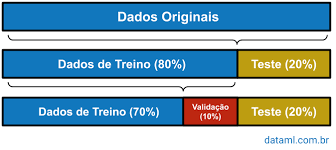

In [7]:
train , test = train_test_split(df,test_size=0.2,random_state=0)

# Retirar colunas que não usaremos

<img src="https://cdn2.iconfinder.com/data/icons/flat-pro-word-processing-set-5/32/table-column-delete-512.png" width="200" height="100"/>

In [8]:
train = train.drop(['PassengerId','Ticket','Name','Cabin'], axis = 1)
test = test.drop(['PassengerId','Ticket','Name','Cabin'], axis = 1)

# Valor Vazio

<img src="https://www.logianalytics.com/wp-content/uploads/2019/06/Missing-values-2.png" width="250" height="100"/>

In [9]:
pd.isna(df).sum().to_frame("Valor Vazio")

,Valor Vazio
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
train['Age'].fillna(train['Age'].mean(), inplace = True)
train.dropna(how='any',inplace=True)

test['Age'].fillna(train['Age'].mean(), inplace = True)
test.dropna(how='any',inplace=True)

# Categóricas em numéricas

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" width="300" height="100"/>

In [11]:
train['Sex'] = np.where(train['Sex'] == 'male', 1,0)
train['Embarked'] = np.where(train['Embarked'] == 'S', 0,
                         np.where(train['Embarked'] == 'Q',1,2))


test['Sex'] = np.where(test['Sex'] == 'male', 1,0)
test['Embarked'] = np.where(test['Embarked'] == 'S', 0,
                         np.where(test['Embarked'] == 'Q',1,2))

# Separar a variável target das features (tanto do treino como do teste)
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [12]:
train_x = train.drop(columns=['Survived'],axis=1)
train_y = train['Survived']

In [13]:
test_x = test.drop(columns=['Survived'],axis=1)
test_y = test['Survived']

## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://i.ibb.co/N3pbLFp/LR-LDA-DT-KNN-SVM-RF.png" width="200" height="80"/>

In [14]:
LR = LogisticRegression(solver='lbfgs', max_iter=10000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT = DecisionTreeClassifier().fit(train_x, train_y)
KN = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC().fit(train_x,train_y)
RF = RandomForestClassifier().fit(train_x,train_y)

## Matriz de confusão + Métricas
<img src="https://www.researchgate.net/profile/Rune-Jacobsen/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png" width="350" height="80"/>

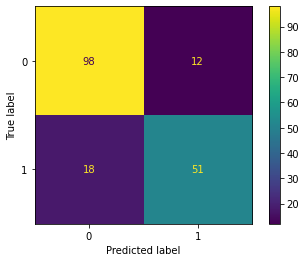

In [15]:
plot_confusion_matrix(RF, test_x, test_y)
plt.show()

In [18]:
metricas = {
        'Accuracy': [LR.score(test_x,test_y),
                 LDA.score(test_x,test_y),
                 DT.score(test_x,test_y),
                 KN.score(test_x,test_y),
                 SVM.score(test_x,test_y),
                 RF.score(test_x,test_y)],
        'Precision': [precision_score(test_y, LR.predict(test_x)),
                      precision_score(test_y, LDA.predict(test_x)),
                      precision_score(test_y, DT.predict(test_x)),
                      precision_score(test_y, KN.predict(test_x)),
                      precision_score(test_y, SVM.predict(test_x)),
                      precision_score(test_y, RF.predict(test_x))],
        'Recall' : [recall_score(test_y,LR.predict(test_x)),
                    recall_score(test_y, LDA.predict(test_x)),
                    recall_score(test_y, DT.predict(test_x)),
                    recall_score(test_y, KN.predict(test_x)),
                    recall_score(test_y, SVM.predict(test_x)),
                    recall_score(test_y, RF.predict(test_x))]
        }

dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision','Recall'], index=['LR','LDA','DT','KN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.798883,0.739130,0.739130
LDA,0.787709,0.731343,0.710145
DT,0.770950,0.725806,0.652174
KN,0.743017,0.709091,0.565217
SVM,0.720670,0.806452,0.362319
RF,0.832402,0.809524,0.739130


## Curva ROC
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/250px-Roc-draft-xkcd-style.svg.png" width="350" height="80"/>

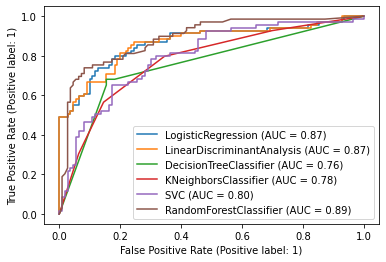

In [17]:
#classifiers = [LR, LDA, DT, KN, SVM, RF]
plot_roc_curve(LR, test_x, test_y, ax=plt.gca())
plot_roc_curve(LDA, test_x, test_y, ax=plt.gca())
plot_roc_curve(DT, test_x, test_y, ax=plt.gca())
plot_roc_curve(KN, test_x, test_y, ax=plt.gca())
plot_roc_curve(SVM, test_x, test_y, ax=plt.gca())
plot_roc_curve(RF, test_x, test_y, ax=plt.gca())